<a href="https://colab.research.google.com/github/PrassanthE/Machine_Learning_Classification/blob/master/Income_Classification(Hyperparameter_tuning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Loading the dataframe
df = pd.read_csv('/content/adult.csv')

# Dataset Description

### Categorical Attributes :

**1. workclass**: (categorical) Private, Self-emp-not-inc(Unincorporated self employment), Self-emp-inc(Incorporated self employment:), Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    - Individual work category
**2. education**: (categorical) Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    - Individual's highest education degree
**3. marital-status**: (categorical) Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    - Individual marital status
**4. occupation**: (categorical) Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
     - Individual's occupation
**5. relationship**: (categorical) Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    - Individual's relation in a family
**6. race**: (categorical) White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    - Race of Individual
**7. sex**: (categorical) Female, Male.

**8. native-country**: (categorical) United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
    - Individual's native country

### Continuous Attributes :

**1. age**: continuous.
    - Age of an individual
**2. education-num**: number of education year, continuous.
    - Individual's year of receiving education
**3. fnlwgt**: final weight, continuous.
    - The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.
    
    - The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. 
    
**4. capital-gain**: continuous.

**5. capital-loss**: continuous.

**6. hours-per-week**: continuous.
    - Individual's working hour per week

In [39]:
#Viewing the dataset
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [40]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [0]:
#Seperating continuous and categorical columns
cont_col = []
cat_col  = []

for i in df.columns :
    if df[i].dtypes == 'O':
        cat_col.append(i)
    else :
        cont_col.append(i)

In [42]:
print('The categorical columns are :\n',cat_col)
print()
print('The continuous columns are  :\n',cont_col)

The categorical columns are :
 ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']

The continuous columns are  :
 ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


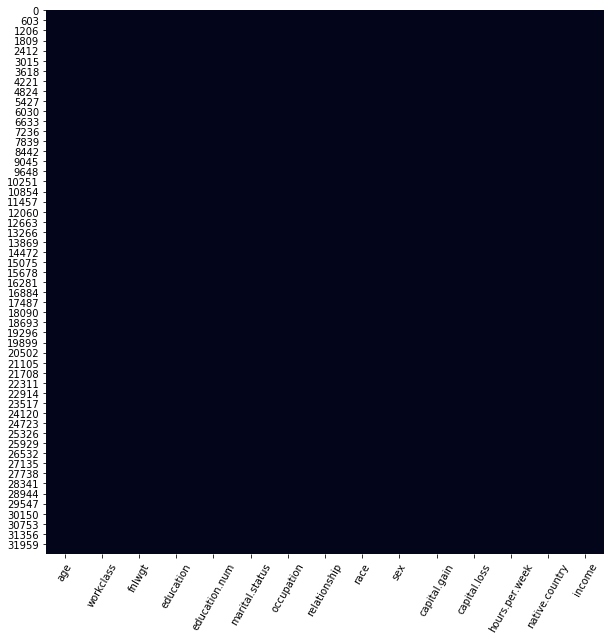

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False)
plt.xticks(rotation=60, fontsize=10)
plt.show()

In [44]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

There are no missing NaN values in the dataset

**FEATURE ENGINEERING**

				 workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


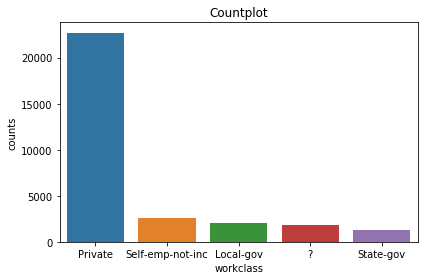




				 education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


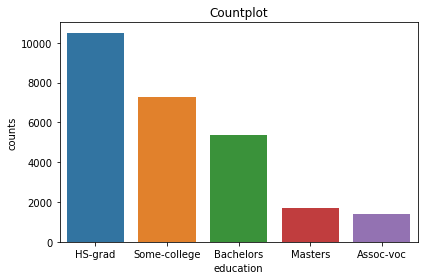




				 marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64


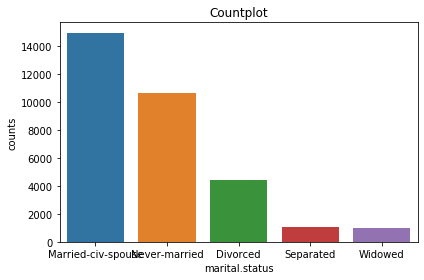




				 occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


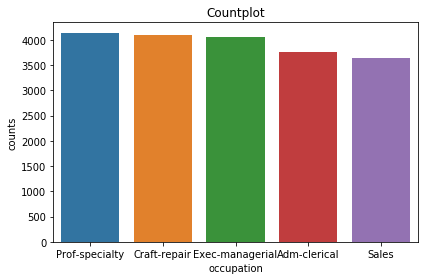




				 relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


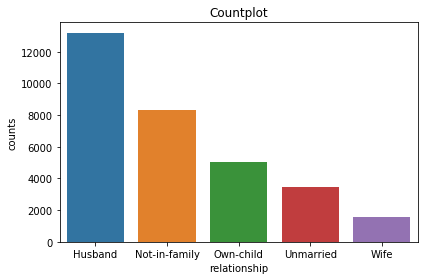




				 race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64


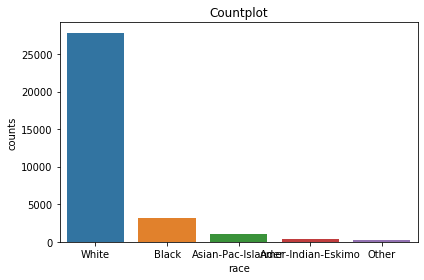




				 sex
Male      21790
Female    10771
Name: sex, dtype: int64


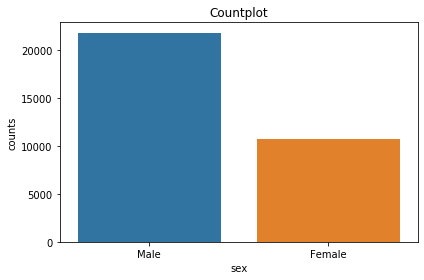




				 native.country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greec

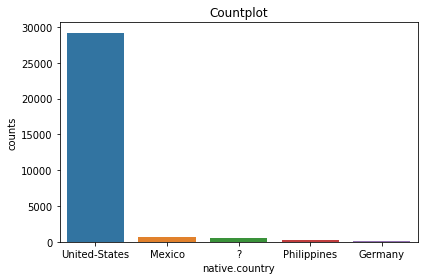




				 income
<=50K    24720
>50K      7841
Name: income, dtype: int64


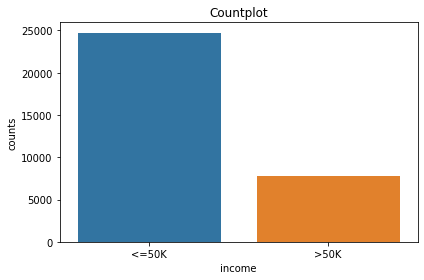

In [45]:
#Gives Frequency of elements in all categorical columns 

for i in cat_col :
    print('\t\t\t\t',i)
    print(df[i].value_counts())
    plt.title('Countplot')
    plt.ylabel('counts')
    plt.xlabel(i)
    sns.barplot(df[i].value_counts().index[:5] , df[i].value_counts().values[:5])
    plt.tight_layout()
    plt.show()
    print('\n\n')

Observation :
   -  ? in all columns need to be imputed
   - Education column can be combined
   - No changes needed for Relationship , Race and Sex columns
   - Native country columns needs to be binned together since there are very less values for some countries

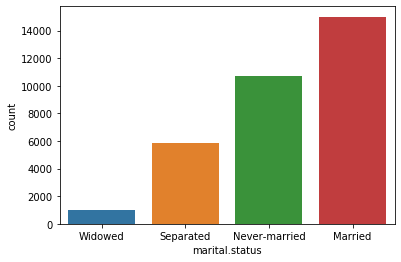

In [46]:
#Cleaning Marital Status column
df['marital.status'].replace({'Married-civ-spouse' : 'Married' ,
                              'Divorced' : 'Separated' , 
                              'Married-AF-spouse' : 'Married' , 
                              'Married-spouse-absent':'Separated'},inplace = True)

sns.countplot(df['marital.status'])

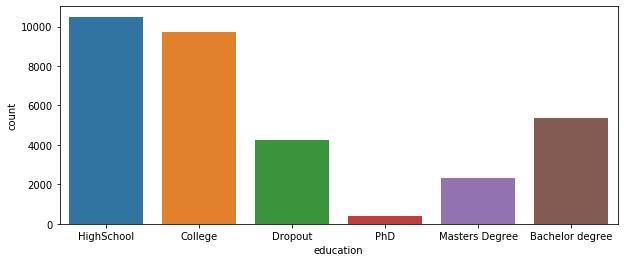

In [47]:
#Cleaning education column

df['education'].replace({'HS-grad':'HighSchool' , 
                         'Some-college':'College' , 
                         'Bachelors' : 'Bachelor degree' , 
                         'Masters' : 'Masters Degree' ,
                         'Assoc-voc' : 'College' , 
                         'Assoc-acdm':'College' , 
                         'Prof-school' : 'Masters Degree' , 
                         'Doctorate' : 'PhD' , 
                         '11th' : 'Dropout' , 
                         '10th' : 'Dropout' ,
                         '7th-8th' : 'Dropout' ,
                         '9th' : 'Dropout' , 
                         '12th' : 'Dropout' ,
                         '5th-6th': 'Dropout' ,
                         '1st-4th': 'Dropout' ,
                         'Preschool':'Dropout'} , inplace = True)

plt.figure(figsize=(10,4))
sns.countplot(df['education'])

In [48]:
#The number of columns with both occupation and workclass unknown

df[(df['occupation'] == "?") & (df['workclass'] == "?")]['age'].count()

#So a new cateogry called unknown is created for both occupation and workclass columns

1836

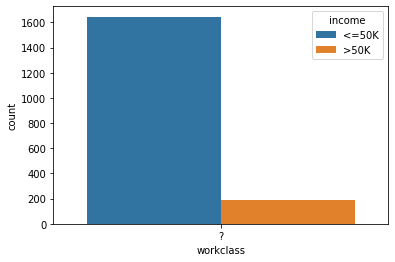

In [49]:
#Imputing WorkClass
sns.countplot(df[df['workclass'] == '?']['workclass'] , hue = df['income'])

In [0]:
#Since there are around 1800 unknown workclass we will create a new seperate unknown category
df['workclass' ].replace({'?' : 'Unknown'} , inplace = True)
df['occupation' ].replace({'?' : 'Unknown'} , inplace = True)

**FOR CONTINUOUS VARIABLES**

In [51]:
cont_col

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [52]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


				 age


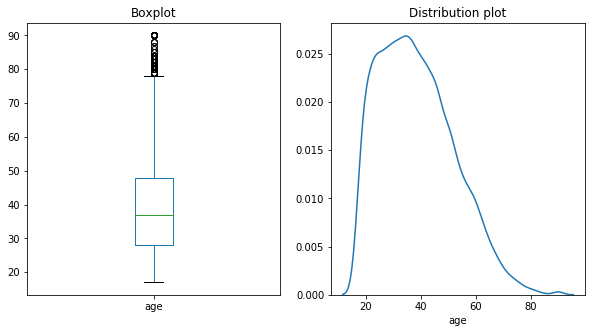

				 fnlwgt


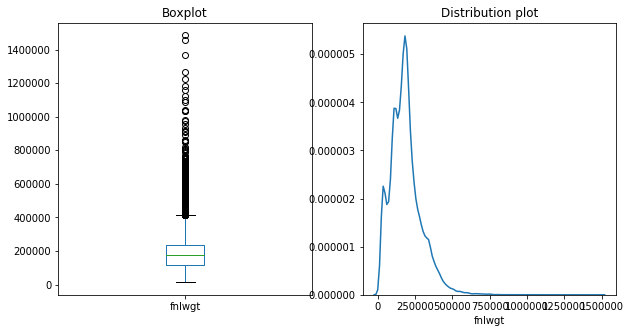

				 education.num


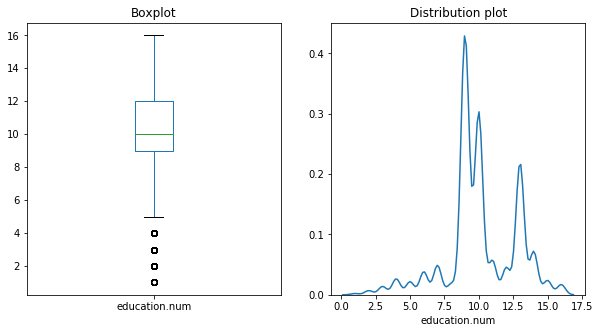

				 hours.per.week


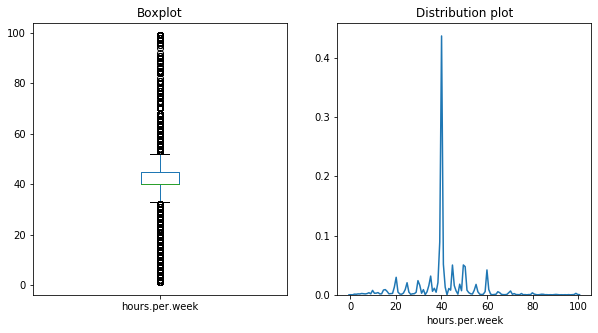

In [53]:
#Box plot and distplot for all continuous variables
for i in ['age','fnlwgt','education.num','hours.per.week']:
    print('\t\t\t\t',i)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title('Boxplot')
    df[i].plot(kind= 'box')
    plt.subplot(1,2,2)
    plt.title('Distribution plot')
    sns.distplot(df[i],hist = False )
    plt.show()

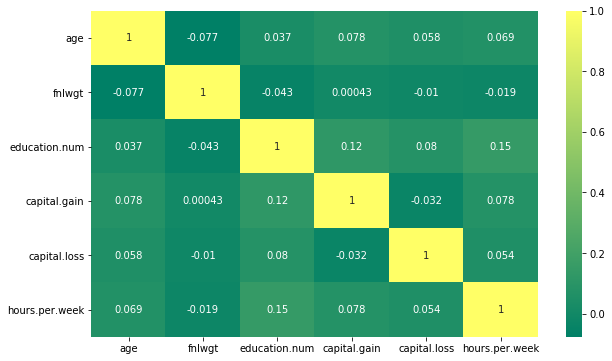

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr() , annot =True , cmap = 'summer' )

In [0]:
#Creating copy of the dataframe df_n
df_n = df.copy()

In [56]:
#The following code does the one hot encoding only when the frequency of each category is greater than 50. 
#After encoding then the first column is dropped inorder to avoid the curse of dimensionality.
#And it deletes the original column after encoding

print('The Encoding is applied for: ')
for col in cat_col[:-1]:
    freqs=df_n[col].value_counts()
    k=freqs.index[freqs>50][:-1]
    for cat in k:
        name=col+'_'+cat
        df_n[name]=(df_n[col]==cat).astype(int)
    del df_n[col]
    print(col)


The Encoding is applied for: 
workclass
education
marital.status
occupation
relationship
race
sex
native.country


In [57]:
#EDA is done for our datasets
df_n.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Private,workclass_Self-emp-not-inc,workclass_Local-gov,workclass_Unknown,workclass_State-gov,workclass_Self-emp-inc,education_HighSchool,education_College,education_Bachelor degree,education_Dropout,education_Masters Degree,marital.status_Married,marital.status_Never-married,marital.status_Separated,occupation_Prof-specialty,occupation_Craft-repair,occupation_Exec-managerial,occupation_Adm-clerical,occupation_Sales,occupation_Other-service,occupation_Machine-op-inspct,occupation_Unknown,occupation_Transport-moving,occupation_Handlers-cleaners,occupation_Farming-fishing,occupation_Tech-support,occupation_Protective-serv,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,race_Black,race_Asian-Pac-Islander,race_Amer-Indian-Eskimo,sex_Male,native.country_United-States,native.country_Mexico,native.country_?,native.country_Philippines,native.country_Germany,native.country_Canada,native.country_Puerto-Rico,native.country_El-Salvador,native.country_India,native.country_Cuba,native.country_England,native.country_Jamaica,native.country_South,native.country_China,native.country_Italy,native.country_Dominican-Republic,native.country_Vietnam,native.country_Guatemala,native.country_Japan,native.country_Poland,native.country_Columbia
0,90,77053,9,0,4356,40,<=50K,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,82,132870,9,0,4356,18,<=50K,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,66,186061,10,0,4356,40,<=50K,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,54,140359,4,0,3900,40,<=50K,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,41,264663,10,0,3900,40,<=50K,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
#Checking our Target column
df_n.groupby(by = 'income').count()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Private,workclass_Self-emp-not-inc,workclass_Local-gov,workclass_Unknown,workclass_State-gov,workclass_Self-emp-inc,education_HighSchool,education_College,education_Bachelor degree,education_Dropout,education_Masters Degree,marital.status_Married,marital.status_Never-married,marital.status_Separated,occupation_Prof-specialty,occupation_Craft-repair,occupation_Exec-managerial,occupation_Adm-clerical,occupation_Sales,occupation_Other-service,occupation_Machine-op-inspct,occupation_Unknown,occupation_Transport-moving,occupation_Handlers-cleaners,occupation_Farming-fishing,occupation_Tech-support,occupation_Protective-serv,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,race_Black,race_Asian-Pac-Islander,race_Amer-Indian-Eskimo,sex_Male,native.country_United-States,native.country_Mexico,native.country_?,native.country_Philippines,native.country_Germany,native.country_Canada,native.country_Puerto-Rico,native.country_El-Salvador,native.country_India,native.country_Cuba,native.country_England,native.country_Jamaica,native.country_South,native.country_China,native.country_Italy,native.country_Dominican-Republic,native.country_Vietnam,native.country_Guatemala,native.country_Japan,native.country_Poland,native.country_Columbia
income,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
<=50K,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720
>50K,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841


In [0]:
#Mapping income greater than 50k as 1
df_n['income'] = df_n['income'].map({'<=50K' : 0 , '>50K' : 1})

In [0]:
#Splitting the target variable

X = df_n.drop(columns='income')
y = df_n['income']

In [0]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X[X.columns] = ss.fit_transform(X[X.columns])

**APPLYING PCA**

In [0]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca = pca.fit_transform(X)

In [63]:
#Checking for cumulative explained varience ratio to choose the best n components for PCA

pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)*100 , index = range(1, X.shape[1]+1) , columns=['Cum. Var']).T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
Cum. Var,6.362288,10.77378,14.572205,18.307654,21.685896,24.474157,27.003232,29.421801,31.733336,33.964695,36.076275,38.083061,40.003464,41.894207,43.690917,45.472975,47.240379,48.953615,50.650946,52.330016,53.98414,55.609103,57.225254,58.828528,60.424014,62.000101,63.573477,65.14304,66.711531,68.278132,69.84415,71.405009,72.964468,74.522586,76.078155,77.625748,79.163689,80.698284,82.219773,83.73005,85.228523,86.694654,88.099408,89.488425,90.837367,92.153584,93.366655,94.506084,95.576276,96.624482,97.488345,98.260768,98.849893,99.383522,99.516893,99.642678,99.747345,99.846077,99.909179,99.957425,99.976589,99.988415,99.996918,100.0


In [0]:
#We will choose 54 PC dimensions since 99% varience is explained in 54 pc dimensions
pca = PCA(n_components=54)
df_pca1 = pca.fit_transform(X)
df_pca1 = pd.DataFrame(df_pca1 , columns=['PC '+str(i) for i in range(1,55)])

In [65]:
display(df_pca1.head())
display(df_pca1.shape)

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15,PC 16,PC 17,PC 18,PC 19,PC 20,PC 21,PC 22,PC 23,PC 24,PC 25,PC 26,PC 27,PC 28,PC 29,PC 30,PC 31,PC 32,PC 33,PC 34,PC 35,PC 36,PC 37,PC 38,PC 39,PC 40,PC 41,PC 42,PC 43,PC 44,PC 45,PC 46,PC 47,PC 48,PC 49,PC 50,PC 51,PC 52,PC 53,PC 54
0,0.150875,-0.696495,0.828032,5.857050,-1.643344,1.225380,-1.068223,2.569292,-1.812526,0.775139,-0.444030,-0.131615,-0.535268,-1.359377,1.259947,0.447922,1.139161,-0.003894,0.065431,-0.486822,-0.928786,-1.528127,6.449430,2.685439,-0.769273,-1.172825,-0.816673,-0.169967,-1.296998,-1.225394,0.053214,-0.618210,-0.785236,1.019713,2.732602,-1.175666,0.270029,1.094729,-1.761986,2.039161,0.422653,-0.230313,4.391478,1.704406,2.110318,2.343683,-0.806475,0.800402,-0.282344,-0.793454,-0.919895,2.242377,0.630743,-0.058855
1,0.345351,-0.858413,-0.473841,-0.013349,-1.926627,0.873921,-1.032022,1.302639,-1.175718,0.800823,0.640864,-0.057278,-1.453226,-1.027019,2.322639,0.433469,-0.158598,-0.214781,-0.131951,-0.267980,-1.020902,-1.376739,6.946206,2.853357,-0.377607,-1.038699,-0.672060,-0.252809,-1.343576,-1.104762,0.247577,-0.588736,-0.865735,1.050789,2.772812,-1.278497,0.045682,1.087375,-1.525003,1.729113,-0.211141,-0.262565,4.255478,2.694265,0.322956,1.968259,-0.135520,2.752557,-0.281240,-1.403378,-1.521417,1.170169,0.498339,-0.031615
2,-1.143863,-1.109209,3.056199,5.498713,-2.037662,-2.153535,-0.898955,0.513274,-1.281057,-2.566454,0.351458,0.599561,0.829470,-0.420039,-0.453356,0.527949,0.225970,0.140131,-0.041636,-0.270927,-1.336955,-2.337012,6.773033,2.522124,-0.843363,-1.199593,-0.651073,-0.141542,-1.010170,-1.212834,0.138161,-0.704825,-0.409961,0.974061,2.449446,-0.923640,0.594329,1.376730,-1.500145,2.461589,-0.469668,-0.282378,3.737930,1.579615,3.022740,2.284309,-1.415430,0.542450,0.026570,-1.763612,-0.136111,1.314710,0.225980,0.068588
3,-1.215209,1.548517,0.304832,-0.308312,-3.473168,1.667399,-0.864988,-0.616338,-0.844204,-0.238983,0.373282,2.601821,-1.068205,0.768264,-0.633047,-0.530059,0.631593,0.878650,0.739147,1.776290,-0.887368,-2.747977,6.025402,2.536108,-0.775340,-0.950127,-0.498977,-0.040575,-0.970031,-1.043545,0.306648,-0.661194,-0.410441,0.813037,2.112097,-1.062792,0.599801,1.828962,-1.813282,1.555515,0.498799,-1.939346,2.148994,3.159826,1.844318,3.065018,0.165059,-0.173650,-0.174314,-1.109899,0.345976,0.385808,0.299314,-0.139774
4,-0.833222,-1.854056,-0.670926,-0.263229,-0.185831,0.378633,-0.706170,-0.839214,0.244651,-0.426044,-0.532481,1.536303,0.827389,0.109843,-0.334945,0.510347,0.478748,0.030750,-0.104607,-0.298879,-1.142002,-2.144164,6.248960,2.045119,-0.534695,-0.812416,-0.704322,-0.101489,-0.838302,-1.158901,0.228759,-0.404586,-0.241017,0.913957,1.875310,-0.572920,0.260096,1.047830,-1.455396,2.318184,-0.075436,-0.185823,2.498938,1.988086,2.364080,3.477403,1.380182,1.255706,-0.387762,1.588717,-2.364117,0.345314,0.661336,-0.039155


(32561, 54)

**TEST TRAIN SPLIT**

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_pca1, y, test_size=0.3, random_state=3 )
print('X_train shape',X_train.shape)
print('y_train shape',y_train.shape)
print('X_test  shape',X_test.shape)
print('y_test  shape',y_test.shape)

X_train shape (22792, 54)
y_train shape (22792,)
X_test  shape (9769, 54)
y_test  shape (9769,)


**HYPERPARAMETER TUNING (Finding the best paramters using RandomizedSearchCV for Random Forest) :**

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier(random_state=3)
params = { 'n_estimators' : sp_randint(50 , 200) , 
           'max_features' : sp_randint(1 , 54) ,
           'max_depth' : sp_randint(2,15) , 
           'min_samples_split' : sp_randint(2,30) ,
           'min_samples_leaf' : sp_randint(1,30) ,
           'criterion' : ['gini' , 'entropy']
    
}

rsearch_rfc = RandomizedSearchCV(rfc , param_distributions= params , n_iter= 200 , cv = 3 , scoring='roc_auc' , random_state= 3 , return_train_score=True , n_jobs=-1)

rsearch_rfc.fit(X_train,y_train)

In [0]:
#The best parameters are,
rsearch_rfc.best_params_

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from scipy.stats import randint as sp_randint

knn = KNeighborsClassifier()

params = {
    'n_neighbors' : sp_randint(1 , 20) ,
    'p' : sp_randint(1 , 5) ,
}

rsearch_knn = RandomizedSearchCV(knn , param_distributions = params , cv = 3 , random_state= 3  , n_jobs = -1 , return_train_score=True)

rsearch_knn.fit(X_train , y_train)

In [0]:
#The best parameters are,
rsearch_knn.best_params_

**HYPERPARAMETER TUNING (Finding the best paramters using RandomizedSearchCV for Decision Tree Classifier) :**

In [0]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=3)
params = { 'max_features' : sp_randint(1 , 54) ,
           'max_depth' : sp_randint(2,15) , 
           'min_samples_leaf' : sp_randint(1,30) ,
           'criterion' : ['gini' , 'entropy']
    
}

rsearch_dtc = RandomizedSearchCV(rfc , param_distributions= params , n_iter= 200 , cv = 3 , scoring='roc_auc' , random_state= 3 , return_train_score=True , n_jobs=-1)

rsearch_dtc.fit(X_train,y_train)

In [0]:
#The best parameters are,
rsearch_dtc.best_params

In [0]:
#Calling remaining classification algorithms
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(fit_intercept=True , solver='liblinear' , random_state=3)

from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(**rsearch_dtc.best_params , random_state=3)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(**rsearch_rfc.best_params_ , random_state=3)

from sklearn.naive_bayes import GaussianNB
gb = GaussianNB(random_state=3)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(rsearch_knn.best_params_ , random_state=3)

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=3)

import lightgbm as lgb
lgbm = lgb.LGBMClassifier(random_state=3)

In [0]:
#Executing various classification algorithms , Test train overall accuracy score , Test train AUC score and ROC AUC curve

from sklearn.metrics import confusion_matrix, classification_report , accuracy_score , roc_auc_score ,roc_curve

algo_arr = [lr ,dt, rfc , gb ,knn , ada ,lgbm]

l={0:'LogisticRegression' ,1:'Decision Tree', 2:'Random Forest' , 3:'Gaussian NB' ,4:'KNN' , 5:'AdaBoost' , 6:'Lightbgm'}
metric=[]
    
for i in range(len(algo_arr)):
    algo_arr[i].fit(X_train , y_train)

    y_train_pred=algo_arr[i].predict(X_train)
    y_train_prob=algo_arr[i].predict_proba(X_train)[:,1]

    print('\t','\t','\t','\t','\t','\t','\t',l[i])
    print('Confusion Matrix - Train' , '\n' , confusion_matrix(y_train,y_train_pred))

    print('Overall Accuracy - Train ', accuracy_score(y_train,y_train_pred))
    metric.append(accuracy_score(y_train,y_train_pred))

    print('AUC - Train: ', roc_auc_score(y_train,y_train_prob))
    metric.append(roc_auc_score(y_train,y_train_prob))

    print('\n')

    y_test_pred = algo_arr[i].predict(X_test)
    y_test_prob=algo_arr[i].predict_proba(X_test)[:,1]

    print('Confusion Matrix - Test ', '\n' , confusion_matrix(y_test,y_test_pred))

    print('Overall Accuracy - Test ', accuracy_score(y_test,y_test_pred))
    metric.append(accuracy_score(y_test,y_test_pred))

    print('AUC - Test: ', roc_auc_score(y_test,y_test_prob))
    metric.append(roc_auc_score(y_test,y_test_prob))
    
    #ROC AUC Curve
    fpr , tpr , threshold = roc_curve(y_test , y_test_prob)
    plt.plot(fpr , tpr)
    plt.plot(fpr , fpr , 'r-')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

In [0]:
#Creating accuracies as dataframe for easy interpretation
al=['LogisticRegression','Decision Tree','Random Forest', 'Gaussian NB','KNN','AdaBoost','Lightbgm']

col=['Train_Accuracy_score', 'Test_Accuracy_score','Train_AUC_score','Test_AUC_score']

me=np.array(metric).reshape(7,4)

c_t=pd.DataFrame(np.round(me,2),columns= col , index=al)

In [0]:
#Comparing various algorithms scores
c_t